In [1]:


import sys
import numpy as np
import pandas as pd
import rasterio
import refet
import pyproj as proj
import xarray
import requests
import multiprocessing as mp
import matplotlib.pyplot as plt
import configparser
import pathlib

In [2]:
#sys.path.append("//")
sys.path.append("../../../Micromet")
import micromet
from micromet.volk import ffp_climatology as ffp
from micromet import AmerifluxDataProcessor

In [3]:

# load initial flux data
station = 'US-UTW'
config_path = f'../../station_config/{station}.ini'
config = configparser.ConfigParser()
config.read(config_path)

spath = "../../secrets/config.ini"
sconfig = configparser.ConfigParser()
sconfig.read(spath)

ed_pass = sconfig['NLDAS']['pw']
ed_user = sconfig['NLDAS']['user']

In [7]:
import datetime

#nldas_out_dir = Path('C:/Users/paulinkenbrandt/Documents/GitHub/MicroMet/Notebooks/Footprints')


for date in pd.date_range(start='2022-01-01', end='2023-01-01',freq='h'):
    hour = date.hour
    if 5 <= hour <= 21:
        print(date)
        micromet.download_nldas(date,
                           hour,
                           ed_user,
                           ed_pass,)

2022-01-01 05:00:00
NLDAS_data\2022_01_01_05.nc already exists, not overwriting.
2022-01-01 06:00:00
NLDAS_data\2022_01_01_06.nc already exists, not overwriting.
2022-01-01 07:00:00
NLDAS_data\2022_01_01_07.nc already exists, not overwriting.
2022-01-01 08:00:00
NLDAS_data\2022_01_01_08.nc already exists, not overwriting.
2022-01-01 09:00:00
NLDAS_data\2022_01_01_09.nc already exists, not overwriting.
2022-01-01 10:00:00
NLDAS_data\2022_01_01_10.nc already exists, not overwriting.
2022-01-01 11:00:00
NLDAS_data\2022_01_01_11.nc already exists, not overwriting.
2022-01-01 12:00:00
NLDAS_data\2022_01_01_12.nc already exists, not overwriting.
2022-01-01 13:00:00
NLDAS_data\2022_01_01_13.nc already exists, not overwriting.
2022-01-01 14:00:00
NLDAS_data\2022_01_01_14.nc already exists, not overwriting.
2022-01-01 15:00:00
NLDAS_data\2022_01_01_15.nc already exists, not overwriting.
2022-01-01 16:00:00
NLDAS_data\2022_01_01_16.nc already exists, not overwriting.
2022-01-01 17:00:00
NLDAS_da

In [8]:
# Define Utah's latitude and longitude boundaries
utah_lat_min, utah_lat_max = 37.0, 42.0
utah_lon_min, utah_lon_max = -114.0, -109.0

# List of uploaded NetCDF files
netcdf_files = pathlib.Path("./NLDAS_data/")

# Extract Utah-specific data from each file and store datasets
utah_datasets = []

for file in netcdf_files.glob(f'2022*.nc'):
    print(file)
    ds_temp = xarray.open_dataset(file)
    ds_utah_temp = ds_temp.sel(lat=slice(utah_lat_min, utah_lat_max), lon=slice(utah_lon_min, utah_lon_max))
    utah_datasets.append(ds_utah_temp)

# Merge all extracted datasets along the time dimension
ds_merged = xarray.concat(utah_datasets, dim="time")

# Display the merged dataset's details
ds_merged


NLDAS_data\2022_01_01_05.nc
NLDAS_data\2022_01_01_06.nc
NLDAS_data\2022_01_01_07.nc
NLDAS_data\2022_01_01_08.nc
NLDAS_data\2022_01_01_09.nc
NLDAS_data\2022_01_01_10.nc
NLDAS_data\2022_01_01_11.nc
NLDAS_data\2022_01_01_12.nc
NLDAS_data\2022_01_01_13.nc
NLDAS_data\2022_01_01_14.nc
NLDAS_data\2022_01_01_15.nc
NLDAS_data\2022_01_01_16.nc
NLDAS_data\2022_01_01_17.nc
NLDAS_data\2022_01_01_18.nc
NLDAS_data\2022_01_01_19.nc
NLDAS_data\2022_01_01_20.nc
NLDAS_data\2022_01_01_21.nc
NLDAS_data\2022_01_02_05.nc
NLDAS_data\2022_01_02_06.nc
NLDAS_data\2022_01_02_07.nc
NLDAS_data\2022_01_02_08.nc
NLDAS_data\2022_01_02_09.nc
NLDAS_data\2022_01_02_10.nc
NLDAS_data\2022_01_02_11.nc
NLDAS_data\2022_01_02_12.nc
NLDAS_data\2022_01_02_13.nc
NLDAS_data\2022_01_02_14.nc
NLDAS_data\2022_01_02_15.nc
NLDAS_data\2022_01_02_16.nc
NLDAS_data\2022_01_02_17.nc
NLDAS_data\2022_01_02_18.nc
NLDAS_data\2022_01_02_19.nc
NLDAS_data\2022_01_02_20.nc
NLDAS_data\2022_01_02_21.nc
NLDAS_data\2022_01_03_05.nc
NLDAS_data\2022_01_0

<xarray.Dataset> Size: 437MB
Dimensions:      (time: 6205, bnds: 2, lat: 40, lon: 40)
Coordinates:
  * lon          (lon) float32 160B -113.9 -113.8 -113.7 ... -109.2 -109.1
  * lat          (lat) float32 160B 37.06 37.19 37.31 ... 41.69 41.81 41.94
  * time         (time) datetime64[ns] 50kB 2022-01-01T05:00:00 ... 2022-12-3...
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] 99kB 2022-01-01T04:00:00 ... 202...
    Tair         (time, lat, lon) float32 40MB 277.1 274.8 278.1 ... 273.8 272.8
    Qair         (time, lat, lon) float32 40MB 0.003496 0.003219 ... 0.004174
    PSurf        (time, lat, lon) float32 40MB 8.857e+04 8.438e+04 ... 7.708e+04
    Wind_E       (time, lat, lon) float32 40MB 2.55 2.19 1.8 ... 4.34 5.4 5.18
    Wind_N       (time, lat, lon) float32 40MB -5.55 -4.75 -3.99 ... 0.64 0.65
    LWdown       (time, lat, lon) float32 40MB 270.6 264.5 288.9 ... 245.6 236.6
    CRainf_frac  (time, lat, lon) float32 40MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    CAPE         (time, lat, lon) float32 40MB 36.0 36.54 36.83 ... 8.21 9.12
    PotEvap      (time, lat, lon) float32 40MB 0.0344 0.0437 ... 0.0458 0.0489
    Rainf        (time, lat, lon) float32 40MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SWdown       (time, lat, lon) float32 40MB 0.0 0.0 0.0 ... 305.6 315.9 316.5
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        hourly
    shortname:              NLDAS_FORA0125_H_2.0
    title:                  NLDAS Primary Forcing Data L4 Hourly 0.125 x 0.12...
    version:                2.0
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/ ; https://lis.g...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

In [12]:
# Save as NetCDF using a compatible format (default for xarray in this environment)
netcdf_output_path = "2022_utah_merged.nc"
ds_merged.to_netcdf(netcdf_output_path)

# Convert to Pandas DataFrame for Parquet format
df_parquet = ds_merged.to_dataframe().reset_index()

# Save as Parquet
parquet_output_path = "2022_utah_merged.parquet"
df_parquet.to_parquet(parquet_output_path, engine="pyarrow")

# Provide download links
netcdf_output_path, parquet_output_path


('2022_utah_merged.nc', '2022_utah_merged.parquet')

In [14]:
import numpy as np
import pandas as pd
import refet

ds = xarray.open_dataset("2023_utah_merged.nc",)

# Convert temperature to Celsius
temp = ds["Tair"].values - 273.15

# Compute actual vapor pressure (ea)
pair = ds["PSurf"].values / 1000  # Convert pressure from Pa to kPa
sph = ds["Qair"].values  # Specific humidity (kg/kg)
ea = refet.calcs._actual_vapor_pressure(q=sph, pair=pair)  # Vapor pressure (kPa)

# Compute wind speed from u and v components
wind_u = ds["Wind_E"].values
wind_v = ds["Wind_N"].values
uz = np.sqrt(wind_u**2 + wind_v**2)  # Wind speed (m/s)

# Extract shortwave radiation
rs = ds["SWdown"].values  # Solar radiation (W/m²)

# Extract time variables
time_vals = ds["time"].values  # Convert to numpy datetime64
dt_index = pd.to_datetime(time_vals)  # Convert to Pandas datetime index
DOY = dt_index.dayofyear.values  # Day of year
HH = dt_index.hour.values  # Hour of day
# Expand DOY and HH to match (time, lat, lon) shape
doy_expanded = np.broadcast_to(DOY[:, np.newaxis, np.newaxis], temp.shape)
hh_expanded = np.broadcast_to(HH[:, np.newaxis, np.newaxis], temp.shape)
# Define input units
unit_dict = {"rs": "w/m2"}

# Define elevation, latitude, longitude (assuming a single representative point)
# If applying to a grid, these should be arrays matching lat/lon grid dimensions
elevation = 1500  # Example elevation in meters, replace with actual value
latitude = ds["lat"].values.mean()  # Take the mean latitude of the dataset
longitude = ds["lon"].values.mean()  # Take the mean longitude of the dataset

# Define measurement height (assumed)
zw = 2.0  # Wind measurement height in meters
zm = zw  # Assuming same height for temperature/humidity

# Define elevation range (664m to 4125m, step 100m)
elevation_range = np.arange(1100, 2000, 25)

# Create an empty array to store ETo values
eto_results = np.zeros((len(elevation_range),) + temp.shape)  # Shape (elevations, time, lat, lon)
etr_results = np.zeros((len(elevation_range),) + temp.shape)

# Loop over elevations and compute ETo
for i, elev in enumerate(elevation_range):
    refet_obj = refet.Hourly(
        tmean=temp, ea=ea, rs=rs, uz=uz,
        zw=2, elev=elev, lat=ds["lat"].values, lon=ds["lon"].values,
        doy=doy_expanded, time=hh_expanded, method="asce", input_units={"rs": "w/m2"}
    )
    eto_results[i] = refet_obj.eto()  # Store ETo results for each elevation
    etr_results[i] = refet_obj.etr()  # Store ETr results for each elevation


# Convert ETo results to an xarray DataArray
eto_da = xarray.DataArray(
    data=eto_results,
    dims=("elevation", "time", "lat", "lon"),
    coords={
        "elevation": elevation_range,
        "time": ds["time"],
        "lat": ds["lat"],
        "lon": ds["lon"]
    },
    attrs={"units": "mm/hour", "description": "Hourly reference evapotranspiration (ASCE) at different elevations"}
)

# Convert ETo results to an xarray DataArray
etr_da = xarray.DataArray(
    data=etr_results,
    dims=("elevation", "time", "lat", "lon"),
    coords={
        "elevation": elevation_range,
        "time": ds["time"],
        "lat": ds["lat"],
        "lon": ds["lon"]
    },
    attrs={"units": "mm/hour", "description": "Hourly reference evapotranspiration (ASCE) at different elevations"}
)


# Add ETo to the dataset
ds = ds.assign(ETo=eto_da)
# Add ETo to the dataset
ds = ds.assign(ETr=etr_da)


# Save the modified dataset (Optional)
ds.to_netcdf("2023_with_eto.nc")

# Display dataset summary to confirm ETo is included
ds



<xarray.Dataset> Size: 6GB
Dimensions:      (time: 6157, bnds: 2, lat: 40, lon: 40, elevation: 36)
Coordinates:
  * lon          (lon) float32 160B -113.9 -113.8 -113.7 ... -109.2 -109.1
  * lat          (lat) float32 160B 37.06 37.19 37.31 ... 41.69 41.81 41.94
  * time         (time) datetime64[ns] 49kB 2023-01-01T06:00:00 ... 2023-12-3...
  * elevation    (elevation) int64 288B 1100 1125 1150 1175 ... 1925 1950 1975
Dimensions without coordinates: bnds
Data variables: (12/14)
    time_bnds    (time, bnds) datetime64[ns] 99kB ...
    Tair         (time, lat, lon) float32 39MB 282.6 280.0 283.1 ... 271.4 270.7
    Qair         (time, lat, lon) float32 39MB 0.006647 0.005858 ... 0.003431
    PSurf        (time, lat, lon) float32 39MB 8.864e+04 8.457e+04 ... 7.781e+04
    Wind_E       (time, lat, lon) float32 39MB -3.25 -2.44 -1.56 ... 2.1 1.95
    Wind_N       (time, lat, lon) float32 39MB 5.35 4.14 3.03 ... 0.7 0.67 0.71
    ...           ...
    CAPE         (time, lat, lon) float32 39MB ...
    PotEvap      (time, lat, lon) float32 39MB ...
    Rainf        (time, lat, lon) float32 39MB ...
    SWdown       (time, lat, lon) float32 39MB 0.0 0.0 0.0 ... 326.3 334.0 331.4
    ETo          (elevation, time, lat, lon) float64 3GB 0.01454 ... 0.08899
    ETr          (elevation, time, lat, lon) float64 3GB 0.01771 ... 0.1014
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        hourly
    shortname:              NLDAS_FORA0125_H_2.0
    title:                  NLDAS Primary Forcing Data L4 Hourly 0.125 x 0.12...
    version:                2.0
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/ ; https://lis.g...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

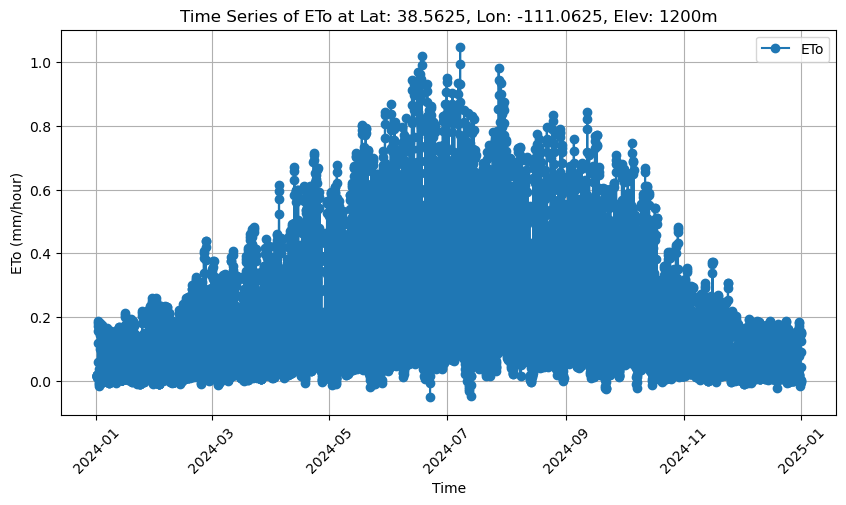

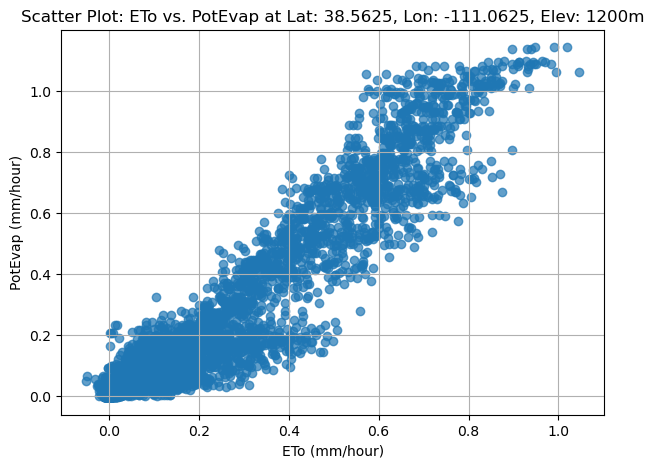

In [45]:
# Define the target latitude, longitude, and elevation (adjust as needed)
target_lat = 38.56  # Example latitude
target_lon = -111.1  # Example longitude
target_elev = 1200  # Example elevation

# Find the nearest latitude, longitude, and elevation in the dataset
nearest_lat = ds["lat"].sel(lat=target_lat, method="nearest").values
nearest_lon = ds["lon"].sel(lon=target_lon, method="nearest").values
nearest_elev = ds["elevation"].sel(elevation=target_elev, method="nearest").values

# Extract ETo time series at the nearest matching location
eto_timeseries = ds["ETo"].sel(elevation=nearest_elev, lat=nearest_lat, lon=nearest_lon)

# Extract PotEvap time series at the same location
pot_evap_timeseries = ds["PotEvap"].sel(lat=nearest_lat, lon=nearest_lon)

# Plot time series of ETo
plt.figure(figsize=(10, 5))
plt.plot(ds["time"], eto_timeseries, marker='o', linestyle='-', label="ETo")
plt.xlabel("Time")
plt.ylabel("ETo (mm/hour)")
plt.title(f"Time Series of ETo at Lat: {nearest_lat}, Lon: {nearest_lon}, Elev: {nearest_elev}m")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot scatter plot of ETo vs PotEvap
plt.figure(figsize=(7, 5))
plt.scatter(eto_timeseries.values.flatten(), pot_evap_timeseries.values.flatten(), alpha=0.7)
plt.xlabel("ETo (mm/hour)")
plt.ylabel("PotEvap (mm/hour)")
plt.title(f"Scatter Plot: ETo vs. PotEvap at Lat: {nearest_lat}, Lon: {nearest_lon}, Elev: {nearest_elev}m")
plt.grid()
plt.show()


In [34]:
ini_dir = pathlib.Path('../../station_config/')



dataset = {}
for year in range(2022, 2025):
    ds = xarray.open_dataset(f"{year}_with_eto.nc",)
    dfs = {}
    for file in ini_dir.glob('US*.ini'):

        name = file.stem
        print(name)
        config = configparser.ConfigParser()
        config.read(file)

        # Define the target latitude, longitude, and elevation (adjust as needed)
        target_lat = pd.to_numeric(config['METADATA']["station_latitude"])
        target_lon = pd.to_numeric(config['METADATA']["station_longitude"])
        target_elev = int(pd.to_numeric(config['METADATA']["station_elevation"]))

        # Find the nearest latitude, longitude, and elevation in the dataset
        nearest_lat = ds["lat"].sel(lat=target_lat, method="nearest").values
        nearest_lon = ds["lon"].sel(lon=target_lon, method="nearest").values
        nearest_elev = ds["elevation"].sel(elevation=target_elev, method="nearest").values

        # Extract ETo time series at the nearest matching location
        eto_timeseries = ds["ETo"].sel(elevation=nearest_elev, lat=nearest_lat, lon=nearest_lon)
        etr_timeseries = ds["ETr"].sel(elevation=nearest_elev, lat=nearest_lat, lon=nearest_lon)

        # Extract PotEvap time series at the same location
        pet_ts = ds["PotEvap"].sel(lat=nearest_lat, lon=nearest_lon)
        lwd_ts = ds["LWdown"].sel(lat=nearest_lat, lon=nearest_lon)
        swd_ts = ds["SWdown"].sel(lat=nearest_lat, lon=nearest_lon)
        temp_ts = ds["Tair"].sel(lat=nearest_lat, lon=nearest_lon)
        rh_ts = ds["Qair"].sel(lat=nearest_lat, lon=nearest_lon)
        pres_ts = ds['PSurf'].sel(lat=nearest_lat, lon=nearest_lon)
        wind_u_ts = ds['Wind_E'].sel(lat=nearest_lat, lon=nearest_lon)
        wind_v_ts = ds['Wind_N'].sel(lat=nearest_lat, lon=nearest_lon)
        wind_ts = np.sqrt(wind_u_ts ** 2 + wind_v_ts ** 2)

        dfs[name] = pd.DataFrame({'datetime':ds["time"],
                                  'eto':eto_timeseries,
                                  'etr':etr_timeseries,
                                  'pet':pet_ts,
                                  'lwdown':lwd_ts,
                                  'swdown':swd_ts,
                                  'temperature':temp_ts,
                                  'rh':rh_ts,
                                  'pressure':pres_ts,
                                  'wind':wind_ts,
                                  }).round(4)
    dataset[year] = pd.concat(dfs)
alldata = pd.concat(dataset)
alldata['datetime'] = pd.to_datetime(alldata['datetime'])

# Save DataFrame to Parquet
alldata.to_parquet('nldas_all.parquet')

US-CdM
US-UTB
US-UTD
US-UTE
US-UTJ
US-UTM
US-UTN
US-UTP
US-UTV
US-UTW
US-CdM
US-UTB
US-UTD
US-UTE
US-UTJ
US-UTM
US-UTN
US-UTP
US-UTV
US-UTW
US-CdM
US-UTB
US-UTD
US-UTE
US-UTJ
US-UTM
US-UTN
US-UTP
US-UTV
US-UTW


datetime     eto     etr     pet      lwdown  \
2022 US-CdM 0    2022-01-01 05:00:00  0.0012  0.0028  0.0081  277.220001   
            1    2022-01-01 06:00:00  0.0032  0.0052  0.0081  268.750000   
            2    2022-01-01 07:00:00  0.0079  0.0099  0.0262  268.750000   
            3    2022-01-01 08:00:00  0.0105  0.0124  0.0262  268.760010   
            4    2022-01-01 09:00:00  0.0121  0.0137  0.0262  259.489990   
...                              ...     ...     ...     ...         ...   
2024 US-UTW 6217 2024-12-31 17:00:00  0.1058  0.1429  0.0720  172.699997   
            6218 2024-12-31 18:00:00  0.1411  0.1830  0.0720  182.800003   
            6219 2024-12-31 19:00:00  0.1577  0.2007  0.1473  182.779999   
            6220 2024-12-31 20:00:00  0.1565  0.1995  0.1473  182.759995   
            6221 2024-12-31 21:00:00  0.1413  0.1837  0.1473  184.889999   

                      swdown  temperature      rh  
2022 US-CdM 0       0.000000   273.690002  0.0038  
            1       0.000000   273.519989  0.0036  
            2       0.000000   272.890015  0.0035  
            3       0.000000   272.260010  0.0033  
            4       0.000000   271.630005  0.0031  
...                      ...          ...     ...  
2024 US-UTW 6217  290.895996   270.100006  0.0019  
            6218  397.742004   271.369995  0.0019  
            6219  450.346985   271.929993  0.0020  
            6220  437.032990   272.489990  0.0021  
            6221  385.660004   273.049988  0.0022  

[185840 rows x 8 columns]

In [42]:
subset = ds.sel(lat=[38.5,39],lon=[-111,-110],time=["2024-10-01", "2024-10-02", "2024-10-03"],method='nearest')

In [44]:
subset.to_netcdf("2024_subset.nc")

In [29]:
# Define Utah's latitude and longitude boundaries
lat_min, lat_max = 37.5, 40.0
lon_min, lon_max = -113.0, -110.0

subset = ds.where(ds.time.dt.month == 6, drop=True).sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
subset.to_netcdf("subset.nc")

In [22]:
ds.time.dt.dayofyear
ds.time.dt.hour
ds.lat.data

array([37.0625, 37.1875, 37.3125, 37.4375, 37.5625, 37.6875, 37.8125,
       37.9375, 38.0625, 38.1875, 38.3125, 38.4375, 38.5625, 38.6875,
       38.8125, 38.9375, 39.0625, 39.1875, 39.3125, 39.4375, 39.5625,
       39.6875, 39.8125, 39.9375, 40.0625, 40.1875, 40.3125, 40.4375,
       40.5625, 40.6875, 40.8125, 40.9375, 41.0625, 41.1875, 41.3125,
       41.4375, 41.5625, 41.6875, 41.8125, 41.9375], dtype=float32)

In [ ]:
ds = xarray.open_dataset("2024_utah_merged.nc",)
# calculate hourly ea from specific humidity
pair = ds.get('PRES_110_SFC').data / 1000 # nldas air pres in Pa convert to kPa
sph = ds.get('SPF_H_110_HTGL').data # kg/kg
ea = refet.calcs._actual_vapor_pressure(q=sph, pair=pair) # ea in kPa
# calculate hourly wind
wind_u = ds.get('U_GRD_110_HTGL').data
wind_v = ds.get('V_GRD_110_HTGL').data
wind = np.sqrt(wind_u ** 2 + wind_v ** 2)
# get temp convert to C
temp = ds.get('TMP_110_HTGL').data - 273.15
# get rs
rs = ds.get('DSWRF_110_SFC').data
unit_dict = {'rs': 'w/m2'}
# create refet object for calculating

refet_obj = refet.Hourly(
    tmean=temp, ea=ea, rs=rs, uz=wind,
    zw=zm, elev=elevation, lat=latitude, lon=longitude,
    doy=DOY, time=HH, method='asce', input_units=unit_dict) #HH must be int
